In [1]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81  # m/s^2
m = 68.1  # kg
Cd = 0.25  # kg/m


def vdot(v):
    return g - Cd/m*v**2


t_0 = 0 # s
t_f = 10 # s
delt = 2 # s


tvals = np.arange(t_0, (t_f + delt), delt)
tvals_loop = np.delete(tvals, 0)  # remove the t=0 from the list, since we have the
# initial conditions for that.

print(tvals)
print(tvals_loop)

[ 0  2  4  6  8 10]
[ 2  4  6  8 10]


$$
    v = \frac{dx}{dt}\\
$$

$$
    \frac{dv}{dt} = g - \frac{C_d}{m}v^2\\
$$


$$
    t = 0 \rightarrow x = 0, \,v = 0
$$



# Euler's Method

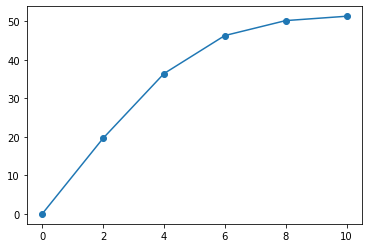

[ 0.         19.62       36.41368282 46.29832088 50.18018199 51.31229165]


In [2]:
v0 = 0
vtm1 = v0  # the first value, v(t=0) = 0
vt = 0
vvals = np.array(v0)  # start the list with the first value

for t in tvals_loop:
    vt = vtm1 + vdot(vtm1)*delt
    vvals = np.append(vvals,vt)
    vtm1 = vt

plt.plot(tvals,vvals, "o-")
plt.show()

print(vvals)

Since the derivative $\frac{dv}{dt}$ doesn't depend on time, we can calculate $x_t$ through old school kinematics:

$$
    x_t = \frac{1}{2}\,\dot{v}\,(v_{t-\Delta t})\,(\Delta t)^2 + v_{t-\Delta t}\,\Delta t + x_{t-\Delta t}
$$

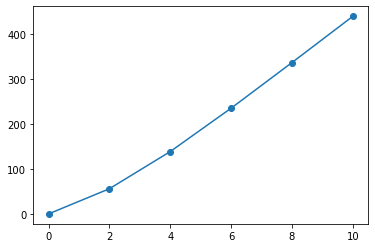

[  0.          56.03368282 138.74568652 235.22418939 336.71666303
 439.62973917]


In [3]:
v0 = 0
vtm1 = v0  # the first value, v(t=0) = 0
vt = 0

x0 = 0
xtm1 = x0  # the first value, x(t=0) = 0
xt = 0
xvals = np.array(x0)  # start the list with the first value

for t in tvals_loop:
    vt = vtm1 + vdot(vtm1)*delt
    vtm1 = vt
    xt = 0.5 * vdot(vt)*(delt)**2 + vt*delt + xtm1
    xvals = np.append(xvals,xt)
    xtm1 = xt
    
    
plt.plot(tvals,xvals, "o-")
plt.show()

print(xvals)

### Let's also compute for a smaller $\Delta t$ :

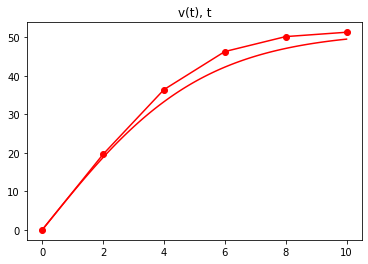

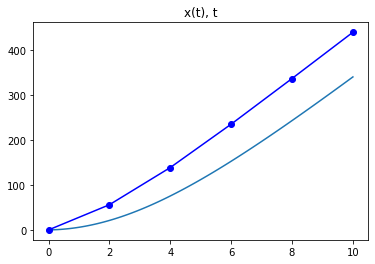

In [4]:
delt = 0.1
tvals_dt = np.arange(t_0, (t_f + delt), delt)
tvals_loop_dt = np.delete(tvals_dt, 0)

v0 = 0
vtm1 = v0  # the first value, v(t=0) = 0
vt = 0
vvals_dt = np.array(v0)

x0 = 0
xtm1 = x0  # the first value, x(t=0) = 0
xt = 0
xvals_dt = np.array(x0)  # start the list with the first value

for t in tvals_loop_dt:
    vt = vtm1 + vdot(vtm1)*delt
    vtm1 = vt
    xt = 0.5 * vdot(vt)*(delt)**2 + vt*delt + xtm1
    xvals_dt = np.append(xvals_dt,xt)
    vvals_dt = np.append(vvals_dt,vt)
    xtm1 = xt
    
plt.plot(tvals_dt,vvals_dt, "r")
plt.plot(tvals, vvals, "-ro")
plt.title("v(t), t")
plt.show()
plt.title("x(t), t")
plt.plot(tvals_dt,xvals_dt)
plt.plot(tvals, xvals, "bo-")
plt.show()


# Runge-Kutta Method

$$
v_{t} = v_{t-1} + \frac{1}{6} \,(k_1 + 2k_2 + 2k_3 + k_4)\,\Delta t
$$

$$
k_1 = \dot v(v_{t-1})\\
k_2= \dot v(v_{t-1}+\tfrac{1}{2}k_1 \Delta t)\\
k_3= \dot v(v_{t-1}+\tfrac{1}{2}k_2 \Delta t)\\
k_4 = \dot v(v_{t-1}+k_3 \Delta t)
$$

Since $\dot v$ doesn't depend on time, the $k_n$ values also won't depend on time.

In [5]:
g = 9.81  # m/s^2
m = 68.1  # kg
Cd = 0.25  # kg/m


def vdot(v):
    return g - Cd/m*v**2


t_0 = 0 # s
t_f = 10 # s
delt = 2 # s


tvals = np.arange(t_0, (t_f + delt), delt)
tvals_loop = np.delete(tvals, 0)

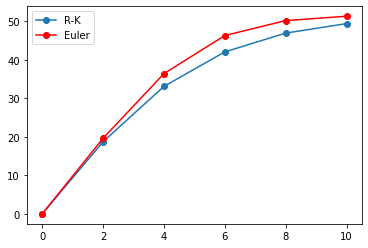

In [6]:
v0 = 0
vtm1 = v0  # the first value, v(t=0) = 0
vt = 0
vvals_rk = np.array(v0)  # start the list with the first value

for t in tvals_loop:
    
    k1 = vdot(vtm1)
    k2 = vdot(vtm1 + 0.5*k1*delt)
    k3 = vdot(vtm1 + 0.5*k2*delt)
    k4 = vdot(vtm1 + k3*delt)
    
    vt = vtm1 + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*delt
    vvals_rk = np.append(vvals_rk,vt)
    vtm1 = vt
    
plt.plot(tvals,vvals_rk,"o-", label="R-K")
plt.plot(tvals,vvals,"or-", label="Euler")
plt.legend()
plt.show()

#### If we compare this result with the low $\Delta t$ Euler computation, we will get an important result for comparing the two methods:

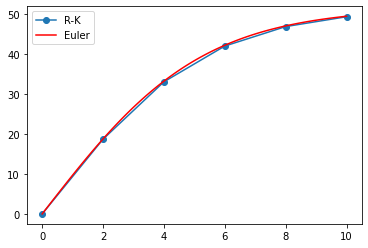

In [7]:
delt = 2
v0 = 0
vtm1 = v0  # the first value, v(t=0) = 0
vt = 0
vvals_rk = np.array(v0)  # start the list with the first value

for t in tvals_loop:
    
    k1 = vdot(vtm1)
    k2 = vdot(vtm1 + 0.5*k1*delt)
    k3 = vdot(vtm1 + 0.5*k2*delt)
    k4 = vdot(vtm1 + k3*delt)
    
    vt = vtm1 + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*delt
    vvals_rk = np.append(vvals_rk,vt)
    vtm1 = vt
    
plt.plot(tvals,vvals_rk,"o-", label="R-K")
plt.plot(tvals_dt,vvals_dt,"r-", label="Euler")
plt.legend()
plt.show()

We see they match up much closer, meaning the Runge-Kutta method is able to achieve the same precision as the Euler computation, with far fewer iterations.

If we also try lowering $\Delta t$ here:

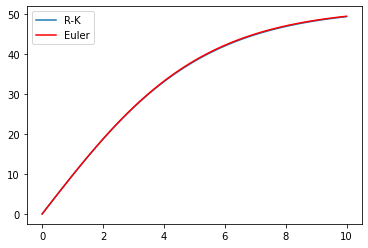

In [8]:
delt = 0.1
tvals_dt = np.arange(t_0, (t_f + delt), delt)
tvals_loop_dt = np.delete(tvals_dt, 0)

v0 = 0
vtm1 = v0  # the first value, v(t=0) = 0
vt = 0
vvals_rk_dt = np.array(v0)  # start the list with the first value

for t in tvals_loop_dt:
    
    k1 = vdot(vtm1)
    k2 = vdot(vtm1 + 0.5*k1*delt)
    k3 = vdot(vtm1 + 0.5*k2*delt)
    k4 = vdot(vtm1 + k3*delt)
    
    vt = vtm1 + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*delt
    vvals_rk_dt = np.append(vvals_rk_dt,vt)
    vtm1 = vt
    
plt.plot(tvals_dt,vvals_rk_dt,"-", label="R-K dt")
plt.plot(tvals_dt,vvals_dt,"r-", label="Euler dt")
plt.legend()
plt.show()

They seem to fit right on.

Now we can use the same formula:

$$
    x_t = \frac{1}{2}\,\dot{v}\,(v_{t-\Delta t})\,(\Delta t)^2 + v_{t-\Delta t}\,\Delta t + x_{t-\Delta t}
$$

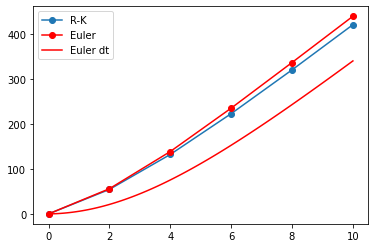

In [9]:
delt = 2
v0 = 0
vtm1 = v0
vt = 0

x0 = 0
xtm1 = x0
xt = 0
xvals_rk = np.array(x0)


for t in tvals_loop:
    
    k1 = vdot(vtm1)
    k2 = vdot(vtm1 + 0.5*k1*delt)
    k3 = vdot(vtm1 + 0.5*k2*delt)
    k4 = vdot(vtm1 + k3*delt)
    
    vt = vtm1 + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*delt
    xt = 0.5 * vdot(vt)*(delt)**2 + vt*delt + xtm1
    xvals_rk = np.append(xvals_rk,xt)
    xtm1 = xt
    vtm1 = vt
    
    
plt.plot(tvals,xvals_rk,"o-", label="R-K")
plt.plot(tvals,xvals,"or-", label="Euler")
plt.plot(tvals_dt,xvals_dt, "r-", label="Euler dt")
plt.legend()
plt.show()

Since the R-K method only changes our formula for $v(t)$ in this computation, the $x(t)$ values don't benefit too much from the change of method, and the value of $\Delta t$ becomes more important to get better precision, as the second order $x(t)$ changes far more rapidly with each interval of t, compared to $v(t)$. 

If we try lowering $\Delta t$ again, the curves will fit snuggly again:

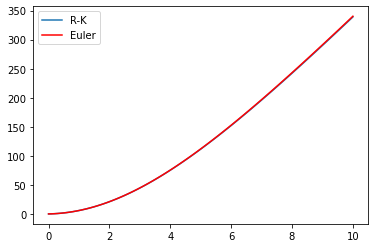

In [10]:
delt = 0.1
tvals_dt = np.arange(t_0, (t_f + delt), delt)
tvals_loop_dt = np.delete(tvals_dt, 0)

v0 = 0
vtm1 = v0
vt = 0

x0 = 0
xtm1 = x0
xt = 0
xvals_rk_dt = np.array(x0)


for t in tvals_loop_dt:
    
    k1 = vdot(vtm1)
    k2 = vdot(vtm1 + 0.5*k1*delt)
    k3 = vdot(vtm1 + 0.5*k2*delt)
    k4 = vdot(vtm1 + k3*delt)
    
    vt = vtm1 + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*delt
    xt = 0.5 * vdot(vt)*(delt)**2 + vt*delt + xtm1
    xvals_rk_dt = np.append(xvals_rk_dt,xt)
    xtm1 = xt
    vtm1 = vt
    
    
plt.plot(tvals_dt,xvals_rk_dt,"-", label="R-K")
plt.plot(tvals_dt,xvals_dt,"r-", label="Euler")
plt.legend()
plt.show()

# References:

- This article:
https://www.sciencedirect.com/topics/mathematics/runge-kutta-method


- Chapra - Numerical Methods for Engineers - 7th Ed.
    - Part 7, Chapter 25
    
    
- Landau, Páez - A Survey of Computational Physics 2008
    - Chapter 9, Parts 9.5.1, 9.5.2